In [1]:
# Code to get all the Posterior mean (95% Equal-tail CI) (95% HPD CI) HPD-CI-width from ./xenarthra_mcmc_out.txt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Read the file
file = open("Xenarthra_out_iqtree_MF.txt", "r")
lines = file.readlines()
file.close()

# Extract the data
data = []

read_flag = False
for line in lines:
    if line.startswith("Posterior"):
        read_flag = True
    if read_flag and line.startswith("t"):
        data.append(line)

In [2]:
data

['t_n34          1.6626 ( 1.5701,  1.8079) ( 1.5510,  1.7764)  0.2254 (Jnode 64)\n',
 't_n35          0.6242 ( 0.5905,  0.6575) ( 0.5904,  0.6572)  0.0668 (Jnode 63)\n',
 't_n36          0.5331 ( 0.4950,  0.5620) ( 0.4985,  0.5643)  0.0658 (Jnode 62)\n',
 't_n37          0.4833 ( 0.4411,  0.5173) ( 0.4457,  0.5208)  0.0751 (Jnode 61)\n',
 't_n38          0.4624 ( 0.4180,  0.4994) ( 0.4218,  0.5017)  0.0799 (Jnode 60)\n',
 't_n39          0.4429 ( 0.3967,  0.4819) ( 0.4010,  0.4851)  0.0841 (Jnode 59)\n',
 't_n40          0.3975 ( 0.3427,  0.4438) ( 0.3461,  0.4462)  0.1001 (Jnode 58)\n',
 't_n41          0.2671 ( 0.1909,  0.3356) ( 0.1922,  0.3368)  0.1447 (Jnode 57)\n',
 't_n42          0.2326 ( 0.1580,  0.3036) ( 0.1621,  0.3070)  0.1449 (Jnode 56)\n',
 't_n43          0.1876 ( 0.1161,  0.2637) ( 0.1162,  0.2637)  0.1476 (Jnode 55)\n',
 't_n44          0.1620 ( 0.0812,  0.2614) ( 0.0762,  0.2526)  0.1764 (Jnode 54)\n',
 't_n45          0.1302 ( 0.0578,  0.2237) ( 0.0498,  0.2126)  0.

In [3]:
node_name = []
posterior_mean_iqtree = []
posterior_mean_baseml = []

lower_ci_iqtree = []
upper_ci_iqtree = []

# Credible intervals for McmcDate
lower_ci_baseml = []
upper_ci_baseml = []


In [4]:
for line in data:
    line = line.strip().split()
    node_name.append(line[0])
    posterior_mean_iqtree.append(float(line[1]))
    lower_ci_iqtree.append(float(line[3][:-1]))
    upper_ci_iqtree.append(float(line[4][:-1]))
    # posterior_mean_baseml.append(float(line[4]))
    # lower_ci_baseml.append(float(line[5]))
    # upper_ci_baseml.append(float(line[6]))

In [5]:
node_name

['t_n34',
 't_n35',
 't_n36',
 't_n37',
 't_n38',
 't_n39',
 't_n40',
 't_n41',
 't_n42',
 't_n43',
 't_n44',
 't_n45',
 't_n46',
 't_n47',
 't_n48',
 't_n49',
 't_n50',
 't_n51',
 't_n52',
 't_n53',
 't_n54',
 't_n55',
 't_n56',
 't_n57',
 't_n58',
 't_n59',
 't_n60',
 't_n61',
 't_n62',
 't_n63',
 't_n64',
 't_n65']

In [6]:
posterior_mean_iqtree

[1.6626,
 0.6242,
 0.5331,
 0.4833,
 0.4624,
 0.4429,
 0.3975,
 0.2671,
 0.2326,
 0.1876,
 0.162,
 0.1302,
 0.4257,
 0.3031,
 0.1391,
 0.4357,
 0.3392,
 0.2433,
 0.1196,
 0.0822,
 0.038,
 0.589,
 0.4531,
 0.3122,
 0.2785,
 0.0167,
 0.1635,
 0.4295,
 0.3284,
 0.2199,
 1.217,
 0.8112]

In [7]:
lower_ci_iqtree

[1.5701,
 0.5905,
 0.495,
 0.4411,
 0.418,
 0.3967,
 0.3427,
 0.1909,
 0.158,
 0.1161,
 0.0812,
 0.0578,
 0.3762,
 0.2384,
 0.0829,
 0.3927,
 0.2894,
 0.1939,
 0.0833,
 0.0554,
 0.0129,
 0.5559,
 0.4011,
 0.2504,
 0.2174,
 0.0009,
 0.1036,
 0.287,
 0.1965,
 0.1149,
 0.6717,
 0.3295]

In [8]:
upper_ci_iqtree

[1.8079,
 0.6575,
 0.562,
 0.5173,
 0.4994,
 0.4819,
 0.4438,
 0.3356,
 0.3036,
 0.2637,
 0.2614,
 0.2237,
 0.4675,
 0.3604,
 0.2037,
 0.4762,
 0.3903,
 0.2955,
 0.1628,
 0.118,
 0.0792,
 0.6256,
 0.5068,
 0.369,
 0.3379,
 0.0618,
 0.2302,
 0.5298,
 0.4457,
 0.3467,
 1.4191,
 1.1486]

In [9]:
file_mcmctree = open("Xenarthra_baseml_mcmc_out_HKY_G5.txt", "r")
lines1 = file_mcmctree.readlines()
file_mcmctree.close()

# Extract the data
data1 = []

read_flag = False
for line in lines1:
    if line.startswith("Posterior"):
        read_flag = True
    if read_flag and line.startswith("t"):
        data1.append(line)
        
for line in data1:
    line = line.strip().split()
    # node_name.append(line[0])
    posterior_mean_baseml.append(float(line[1]))
    lower_ci_baseml.append(float(line[3][:-1]))
    upper_ci_baseml.append(float(line[4][:-1]))

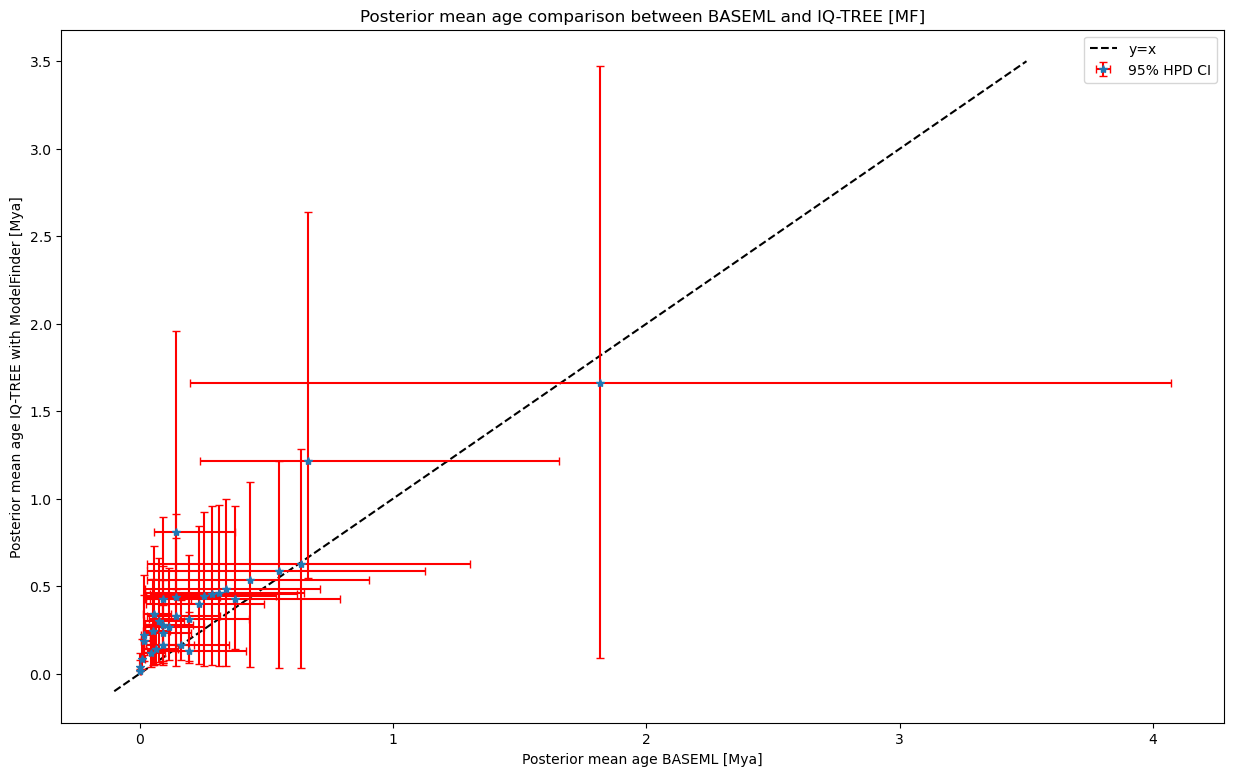

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# # Example data
# # Posterior means for MCMCtree (x-axis) and McmcDate (y-axis)
# posterior_mean_mcmctree = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
# posterior_mean_mcmcdate = [110, 210, 310, 410, 510, 610, 710, 810, 910, 1010]
# 
# # Credible intervals for MCMCtree
# lower_ci_mcmctree = [90, 180, 270, 360, 450, 540, 630, 720, 810, 900]
# upper_ci_mcmctree = [110, 220, 330, 440, 550, 660, 770, 880, 990, 1100]
# 
# # Credible intervals for McmcDate
# lower_ci_mcmcdate = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
# upper_ci_mcmcdate = [120, 220, 320, 420, 520, 620, 720, 820, 920, 1020]

# Calculate error bars
xerr = [np.array(lower_ci_baseml), 
        np.array(upper_ci_baseml)]
yerr = [np.array(lower_ci_iqtree), 
        np.array(upper_ci_iqtree)]

# Plotting
fig, ax = plt.subplots(figsize=(15, 9))
ax.plot([-0.1,3.5], 
        [-0.1, 3.5], 
        'k--', label='y=x')
ax.errorbar(posterior_mean_baseml, posterior_mean_iqtree, 
            xerr=xerr, yerr=yerr, fmt='*', ecolor='r', capsize=3, label='95% HPD CI')

# Labels and title
ax.set_xlabel('Posterior mean age BASEML [Mya]')
ax.set_ylabel('Posterior mean age IQ-TREE with ModelFinder [Mya]')
ax.set_title('Posterior mean age comparison between BASEML and IQ-TREE [MF]')
ax.legend()

# Show plot
# plt.show()
plt.savefig('/home/piyumal/PHD/phylogenetics/code/TreeMatching2/date_testing/Xenarthra_posterior_mean_age_comparison_MF.png')

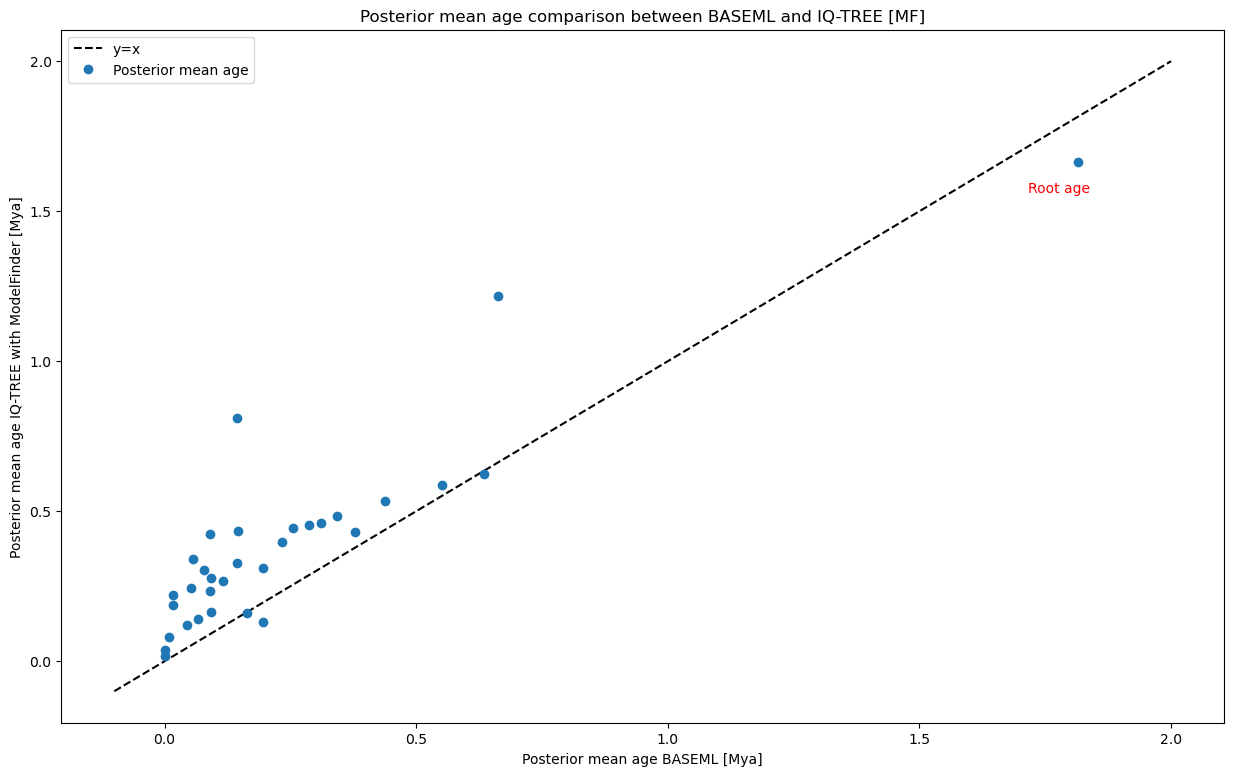

In [18]:
# Calculate error bars
xerr = [np.array(lower_ci_baseml), 
        np.array(upper_ci_baseml)]
yerr = [np.array(lower_ci_iqtree), 
        np.array(upper_ci_iqtree)]

# Plotting
fig, ax = plt.subplots(figsize=(15, 9))
ax.plot([-0.1,2.0], 
        [-0.1, 2.0], 
        'k--', label='y=x')
ax.plot(posterior_mean_baseml, posterior_mean_iqtree, 'o', label='Posterior mean age')
 
# Labels and title
ax.set_xlabel('Posterior mean age BASEML [Mya]')
ax.set_ylabel('Posterior mean age IQ-TREE with ModelFinder [Mya]')
ax.set_title('Posterior mean age comparison between BASEML and IQ-TREE [MF]')
ax.legend()

point_x = posterior_mean_baseml[0]  # Example: first point in the list
point_y = posterior_mean_iqtree[0]  # Example: first point in the list
ax.annotate('Root age', xy=(point_x, point_y), xytext=(point_x - 0.1, point_y - 0.1), color='red')
# Show plot
# plt.show()
plt.savefig('/home/piyumal/PHD/phylogenetics/code/TreeMatching2/date_testing/Xenarthra_posterior_mean_age_comparison_MF_scatter.png')

In [11]:
posterior_mean_baseml

[1.8153,
 0.6356,
 0.4374,
 0.3423,
 0.3118,
 0.256,
 0.2332,
 0.1164,
 0.0911,
 0.0172,
 0.1634,
 0.1958,
 0.0907,
 0.0779,
 0.0658,
 0.1453,
 0.0561,
 0.0533,
 0.045,
 0.0097,
 0.0004,
 0.5514,
 0.2876,
 0.1964,
 0.0915,
 0.001,
 0.093,
 0.3777,
 0.1434,
 0.017,
 0.6628,
 0.1448]

In [12]:
posterior_mean_iqtree

[1.6626,
 0.6242,
 0.5331,
 0.4833,
 0.4624,
 0.4429,
 0.3975,
 0.2671,
 0.2326,
 0.1876,
 0.162,
 0.1302,
 0.4257,
 0.3031,
 0.1391,
 0.4357,
 0.3392,
 0.2433,
 0.1196,
 0.0822,
 0.038,
 0.589,
 0.4531,
 0.3122,
 0.2785,
 0.0167,
 0.1635,
 0.4295,
 0.3284,
 0.2199,
 1.217,
 0.8112]